# Looking at genre popularity

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [149]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

### Joining imdb_title_basics_df and imdb_ratings_df

The goal here is to see which movie genres performed well based on their average rating.

In [150]:
imdb_basics_rating_df = pd.merge(left=imdb_basics_df,right=imdb_ratings_df,
                               on='tconst',how='inner')

In [151]:
movie_gross_df_copy = movie_gross_df.copy()
movie_gross_df_copy.rename(columns={'title': 'primary_title'}, inplace=True)
movie_gross_df_copy

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Joining movie_gross_df

In [152]:
imdb_basics_rating_gross = pd.merge(left=imdb_basics_rating_df,right=movie_gross_df_copy,
                               on='primary_title',how='inner')

In [153]:
imdb_basics_rating_gross

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [154]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


### Cleaning the resulting dataframe

foreign_gross is a string type column, need to conver to float data type.

In [155]:
imdb_basics_rating_gross['foreign_gross'] = imdb_basics_rating_gross['foreign_gross'].str.replace(',','')

In [156]:
imdb_basics_rating_gross['foreign_gross'] = imdb_basics_rating_gross['foreign_gross'].astype(float)

In [157]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 307.4+ KB


### Dealing with columns with missing values

The domestic_gross column has a few missing values. Dropping those few will not make a significant impact on the analysis.

In [158]:
imdb_basics_rating_gross = imdb_basics_rating_gross[imdb_basics_rating_gross['domestic_gross'].isna() != True]

In [159]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3005 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3005 non-null   object 
 1   primary_title    3005 non-null   object 
 2   original_title   3005 non-null   object 
 3   start_year       3005 non-null   int64  
 4   runtime_minutes  2958 non-null   float64
 5   genres           2998 non-null   object 
 6   averagerating    3005 non-null   float64
 7   numvotes         3005 non-null   int64  
 8   studio           3004 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1810 non-null   float64
 11  year             3005 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 305.2+ KB


The genres column also has missing values. We will drop these rows since it is only a few and we cannot replace them without knowing the exact genres the movies are categorized by.

In [160]:
imdb_basics_rating_gross = imdb_basics_rating_gross[imdb_basics_rating_gross['genres'].isna() != True]

In [161]:
imdb_basics_rating_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2998 non-null   object 
 1   primary_title    2998 non-null   object 
 2   original_title   2998 non-null   object 
 3   start_year       2998 non-null   int64  
 4   runtime_minutes  2953 non-null   float64
 5   genres           2998 non-null   object 
 6   averagerating    2998 non-null   float64
 7   numvotes         2998 non-null   int64  
 8   studio           2997 non-null   object 
 9   domestic_gross   2998 non-null   float64
 10  foreign_gross    1803 non-null   float64
 11  year             2998 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 304.5+ KB


### Finding the top 10 movie genres with at least an 8 average rating

We want to know which movie genres are popular. The way we will distinguish which genres are popular, will be to look at the movies that were rated at least an 8.

In [162]:
ratings_over_8 = imdb_basics_rating_gross[imdb_basics_rating_gross['averagerating'] >= 8]

In [163]:
genres = list(ratings_over_8['genres'].unique())
x = []

for genre in genres:
    x.append(str(genre).split(','))

    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [164]:
sorted_imdb_genres = {k: v for k, v in sorted(genres_freq.items(), key=lambda item: item[1])}
sorted_imdb_genres

{'Western': 1,
 'News': 1,
 'Fantasy': 2,
 'Sci-Fi': 3,
 'War': 3,
 'Family': 3,
 'Romance': 4,
 'Mystery': 4,
 'Animation': 5,
 'Music': 5,
 'Sport': 5,
 'History': 7,
 'Adventure': 10,
 'Thriller': 11,
 'Crime': 11,
 'Action': 12,
 'Comedy': 13,
 'Biography': 16,
 'Documentary': 20,
 'Drama': 35}

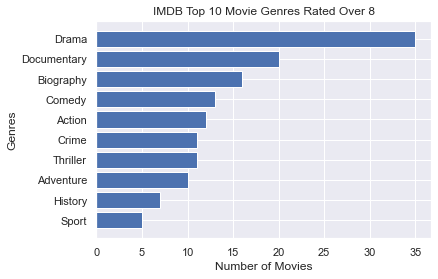

In [168]:
x = list(sorted_imdb_genres.keys())[10:]
y = list(sorted_imdb_genres.values())[10:]

fig, ax = plt.subplots()
ax.barh(x,y)
ax.set_title('IMDB Top 10 Movie Genres Rated Over 8')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Genres');

### Looking at rotten tomatoes genre ratings

In [110]:
rt_reviews_df.dropna(inplace=True)

In [111]:
joinedrt = rt_movies_df.set_index('id').join(rt_reviews_df, on = 'id', lsuffix = ' guidelines', rsuffix =' critical')

In [112]:
joinedrt = joinedrt.dropna(subset = ['runtime'])

In [113]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1485 non-null   object 
 1   rating guidelines  1530 non-null   object 
 2   genre              1526 non-null   object 
 3   director           1345 non-null   object 
 4   writer             1100 non-null   object 
 5   theater_date       1194 non-null   object 
 6   dvd_date           1194 non-null   object 
 7   currency           338 non-null    object 
 8   box_office         338 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             489 non-null    object 
 11  id                 933 non-null    float64
 12  review             933 non-null    object 
 13  rating critical    933 non-null    object 
 14  fresh              933 non-null    object 
 15  critic             933 non-null    object 
 16  top_critic         933 n

In [114]:
joinedrt['freshnum'] = joinedrt['fresh'].map({'fresh': 1, 'rotten': 0})

In [115]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'3/4' : 75, '4/5' : 80, '3/5' : 60, '1/4': 25, '1/5': 20,'3.5/4' : 87, '2/5': 40, '2/4': 50, '3.7/5': 74})

In [116]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2.5/4': 63, '3.5/5' : 70, '5/5': 100, 'B': 85, '4/4': 100, 'B+': 88, "A-": 93, '2.5/5' : 50, "8/10" : 80, 'B-': 82, '4.5/5': 90, '1.5/4': 37.5, 'A': 95, '6/10': 60, 'C+': 77, '9/10': 90, "C": 74, 'C-': 72, '5/10': 50, '1.5/5': 30, '7/10': 70})

In [117]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'0/5':0, '8': 80, '1': 10, '4/10': 40, 'D+': 69, '7': 70, '3/10': 30, 'D': 67, "0.5/4": 13, '6': 60}) 

In [118]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({"3": 30, "D-": 66, "1/10": 10, '0/4' : 0, '8.5/10': 85, "A+": 98, '4.0/4': 100, "8.4/10": 84, "9": 90, "F": 35, "7.5/10": 75, "7.7": 77, "2": 20, "0": 0, "2.0/5": 40, '0.5/10': 5}) 

In [119]:
joinedrt['rating critical'] = joinedrt['rating critical'].replace({'2/10': 20, '5.0/5': 100, '3.0/5': 60, "2.5": 50, '5': 50, '2.2/5': 44})

In [120]:
joinedrt['rating critical'].value_counts()

75.0     122
80.0     113
60.0      85
100.0     76
50.0      76
87.0      74
63.0      46
40.0      44
70.0      41
85.0      33
88.0      29
90.0      24
93.0      22
95.0      16
20.0      15
37.5      15
82.0      14
74.0      13
30.0      13
77.0      13
25.0      11
72.0      11
10.0       6
0.0        6
69.0       4
84.0       2
67.0       2
98.0       2
13.0       2
44.0       1
5.0        1
35.0       1
Name: rating critical, dtype: int64

In [121]:
joinedrt.head()

,synopsis,rating guidelines,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating critical,fresh,critic,top_critic,publisher,date,freshnum
id,,,,,,,,,,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,3.0,"Quickly grows repetitive and tiresome, meander...",74.0,rotten,Eric D. Snider,0.0,EricDSnider.com,"July 17, 2013",0.0
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,3.0,Cronenberg is not a director to be daunted by ...,40.0,rotten,Matt Kelemen,0.0,Las Vegas CityLife,"April 21, 2013",0.0


In [122]:
joinedrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 2000
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           1485 non-null   object 
 1   rating guidelines  1530 non-null   object 
 2   genre              1526 non-null   object 
 3   director           1345 non-null   object 
 4   writer             1100 non-null   object 
 5   theater_date       1194 non-null   object 
 6   dvd_date           1194 non-null   object 
 7   currency           338 non-null    object 
 8   box_office         338 non-null    object 
 9   runtime            1530 non-null   object 
 10  studio             489 non-null    object 
 11  id                 933 non-null    float64
 12  review             933 non-null    object 
 13  rating critical    933 non-null    float64
 14  fresh              933 non-null    object 
 15  critic             933 non-null    object 
 16  top_critic         933 n

In [123]:
joinedrt['rating critical'] = joinedrt['rating critical']/10
ratings_over_8 = joinedrt[joinedrt['rating critical'] >= 8]

In [124]:
ratings_over_8

,synopsis,rating guidelines,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,id,review,rating critical,fresh,critic,top_critic,publisher,date,freshnum
id,,,,,,,,,,,,,,,,,,,,
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,3.0,The anger over the injustice of the financial ...,8.5,fresh,Robert Roten,0.0,Laramie Movie Scope,"January 7, 2013",1.0
19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,NaN,NaN,"Aug 23, 2002","Sep 30, 2003",NaN,NaN,90 minutes,Seventh Art Releasing,3.0,A black comedy as dry and deadpan as a bleache...,10.0,fresh,John Beifuss,0.0,"Commercial Appeal (Memphis, TN)","September 10, 2012",1.0
22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,3.0,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0.0,Arkansas Democrat-Gazette,"September 7, 2012",1.0
35,"In this film, conjoined twins Blake and Franci...",R,Drama,Michael Polish,Michael Polish|Mark Polish,"Jul 30, 1999","Jan 18, 2000",NaN,NaN,110 minutes,NaN,3.0,Though hardly a crowd-pleaser. it's the sort o...,9.3,fresh,Frank Swietek,0.0,One Guy's Opinion,"August 30, 2012",1.0
40,John Sayles' Casa de los Babys tells the tale ...,R,Drama,John Sayles,John Sayles,"Sep 19, 2003","Apr 13, 2004",$,"312,136",95 minutes,NaN,3.0,Cosmopolis is an investment that pays off enor...,10.0,fresh,Peter Sobczynski,0.0,eFilmCritic.com,"August 24, 2012",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN,58.0,All of this is accomplished with wonderfully o...,8.7,fresh,Roger Ebert,1.0,Chicago Sun-Times,"October 23, 2004",1.0
1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures,58.0,"Good, but not great Allen film.",8.0,fresh,Ken Hanke,0.0,"Mountain Xpress (Asheville, NC)","August 14, 2003",1.0
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,58.0,Even the swamps of New Jersey look beautiful.,10.0,fresh,Janet Maslin,1.0,New York Times,"May 20, 2003",1.0


In [125]:
ratings_over_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 13 to 1998
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synopsis           399 non-null    object 
 1   rating guidelines  405 non-null    object 
 2   genre              404 non-null    object 
 3   director           363 non-null    object 
 4   writer             283 non-null    object 
 5   theater_date       318 non-null    object 
 6   dvd_date           318 non-null    object 
 7   currency           99 non-null     object 
 8   box_office         99 non-null     object 
 9   runtime            405 non-null    object 
 10  studio             138 non-null    object 
 11  id                 405 non-null    float64
 12  review             405 non-null    object 
 13  rating critical    405 non-null    float64
 14  fresh              405 non-null    object 
 15  critic             405 non-null    object 
 16  top_critic         405 n

In [126]:
genres = list(ratings_over_8['genre'].unique())
x = []

for genre in genres:
    x.append(str(genre).split('|'))

    
genres_freq = {}

for lists in x:
    for genre in lists:
        if genre in genres_freq:
            genres_freq[genre] += 1
        else:
            genres_freq[genre] = 1

In [147]:
genres_freq
sorted_rt_genres = {k: v for k, v in sorted(genres_freq.items(), key=lambda item: item[1])}
sorted_rt_genres

{'Gay and Lesbian': 1,
 'nan': 1,
 'Cult Movies': 2,
 'Sports and Fitness': 2,
 'Faith and Spirituality': 2,
 'Television': 4,
 'Western': 8,
 'Horror': 13,
 'Animation': 13,
 'Documentary': 14,
 'Special Interest': 15,
 'Musical and Performing Arts': 15,
 'Kids and Family': 19,
 'Romance': 24,
 'Art House and International': 27,
 'Mystery and Suspense': 30,
 'Science Fiction and Fantasy': 33,
 'Classics': 34,
 'Action and Adventure': 41,
 'Comedy': 52,
 'Drama': 60}

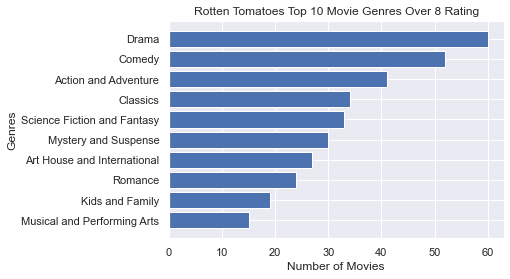

In [167]:
x = list(sorted_rt_genres.keys())[11:]
y = list(sorted_rt_genres.values())[11:]

fig, ax = plt.subplots()
ax.barh(x,y)
ax.set_title('Rotten Tomatoes Top 10 Movie Genres Over 8 Rating')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Genres');


### Looking at both IMDB and Rotten Tomatoes popular movie genres

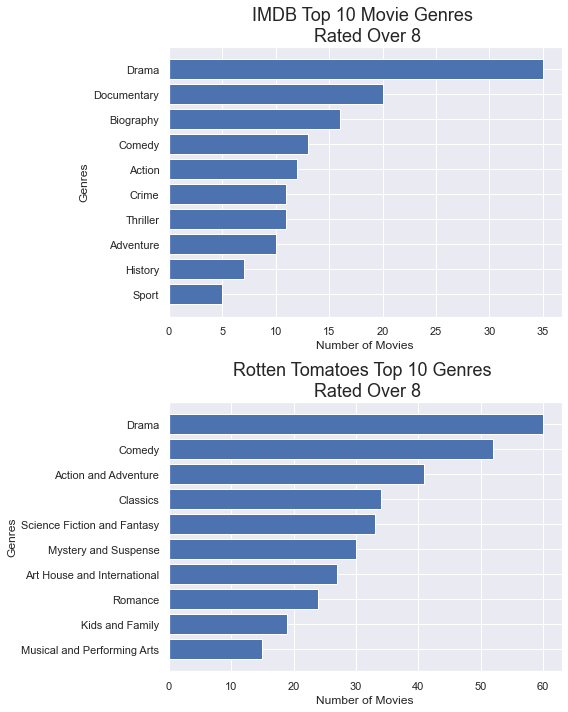

In [195]:
imdb_x = list(sorted_imdb_genres.keys())[10:]
imdb_y = list(sorted_imdb_genres.values())[10:]

rt_x = list(sorted_rt_genres.keys())[11:]
rt_y = list(sorted_rt_genres.values())[11:]

plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
plt.barh(imdb_x,imdb_y)
plt.title('IMDB Top 10 Movie Genres \n Rated Over 8', fontdict = {'fontsize' : 18})
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

plt.subplot(2,1,2)
plt.barh(rt_x,rt_y)
plt.title('Rotten Tomatoes Top 10 Genres \n Rated Over 8', fontdict = {'fontsize' : 18})
plt.xlabel('Number of Movies')
plt.ylabel('Genres')

plt.tight_layout()
plt.show()
